# Applied Machine Learning: Unsupervised Learning

## Introduction: Unsupervised Learning
#### Unsupervized Learning involves tasks that operate on datasets without labeled responses or target values.
#### Instead, the goal is to capture interesting structure or information.
### Applications of unsupervised learning:
#### Visualize structure of a complex dataset.
#### Sensity estimation to predict probabilities of events.
#### Compress and summarize the data.
#### Extract features for supervised learning.
#### Discover important clusters or outliers.

### Two major types of unsupervised learning methods
#### Transformations: 1. Density Estimation, 2. Dimensionality Reduction 
---- Processes that extract or compute information
#### Clustering
---- Find groups in the data

---- Assign every point in the dataset to one of the groups.

## Preamble and Datasets

In [32]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


## Dimensionality Reduction and Manifold Learning

### Dimensionality Reduction (PCA)
#### Finds an approximate version of your dataset using fewer features.
#### Used for exploring and visualizing a dataset to understand grouping or relationships.
#### Often visualized using a 2-dimensional scatterplot
#### Also used for compression, finding features for supervised learning
The one-dimensional approximation is obtained by projecting the original points onto the diagonal line and using their position on that line as the new single feature.

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


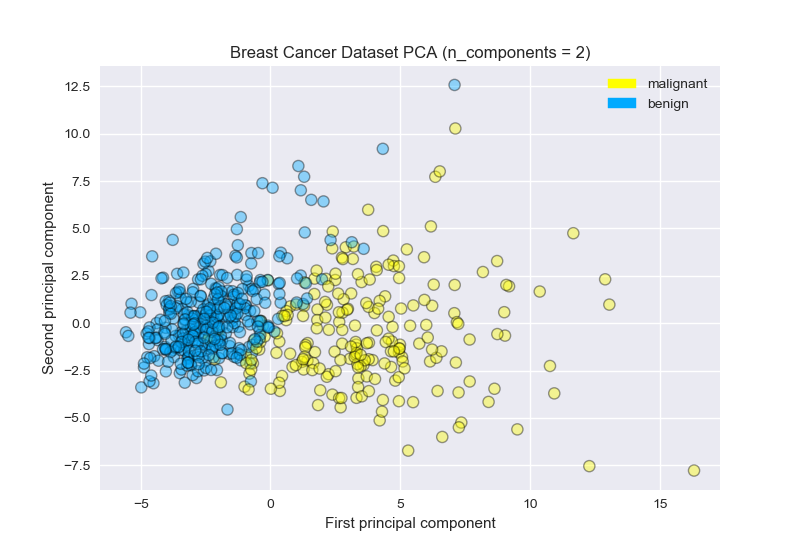

(569,)


In [58]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])
print(y_cancer.shape)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


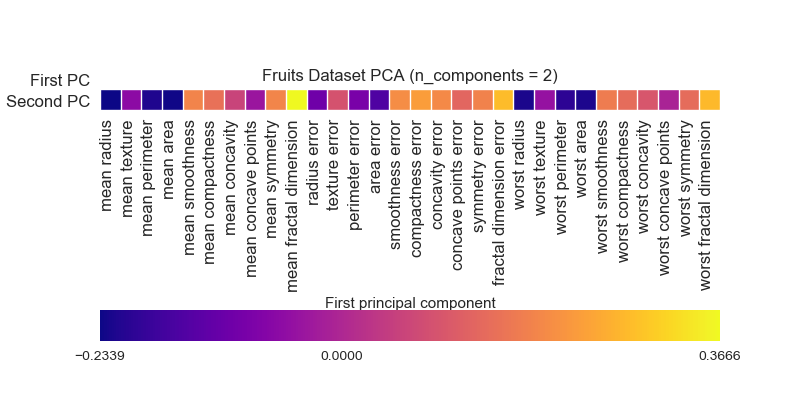

[[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


In [21]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);
print(pca.components_.reshape(2, 30).T)
## First components are all positive

#### PCA on the fruit dataset (for comparison)

<IPython.core.display.Javascript object>


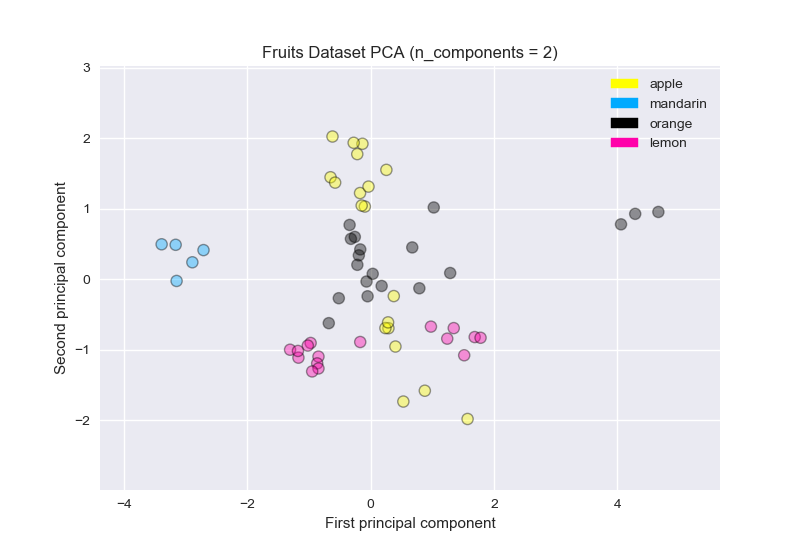

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, np.array(y_fruits).reshape(-1, ),  ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

Manifold Learning Algorithms are very good at finding low dimensional structure in high dimensional data and useful for visualizations.

#### Multidimensional scaling (MDS) on the fruit dataset
MDS attempts to find adistance-preserving low-dimensional projection
MDS preserves information about how th epoints in the original data space are close to each other.

<IPython.core.display.Javascript object>


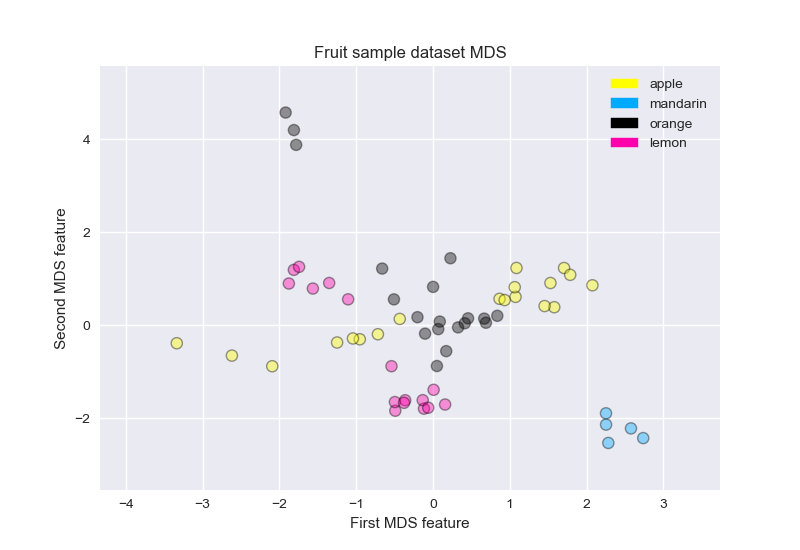

In [70]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, np.array(y_fruits).reshape(-1,), ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


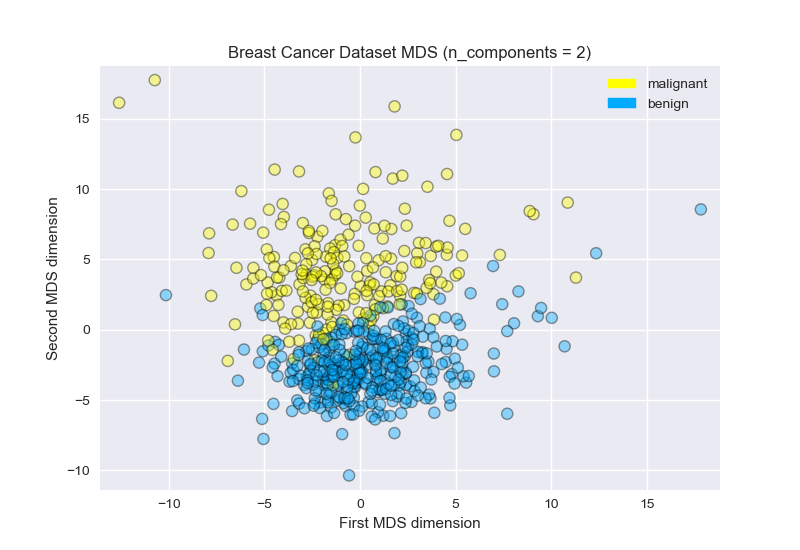

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

### t-SNE: a powerful manifold learning method that finds a 2D projection preserving information about neighbours.
### t-SNE finds a two-dimensional representation of the data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset.
### t-SNE gives much more weight to preserving information about distances between points that are neighbors.
#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.) Using manifold learning methods different approaches on specific data set.
t-SNE tends to work better on datasets that have more well-defined local structure, more clearly defined patterns of neighbors.

<IPython.core.display.Javascript object>


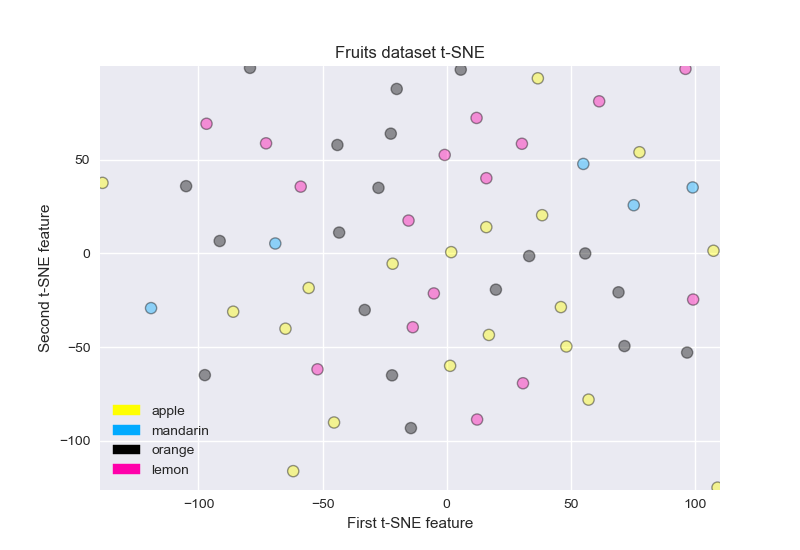

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, np.array(y_fruits).reshape(-1,), 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


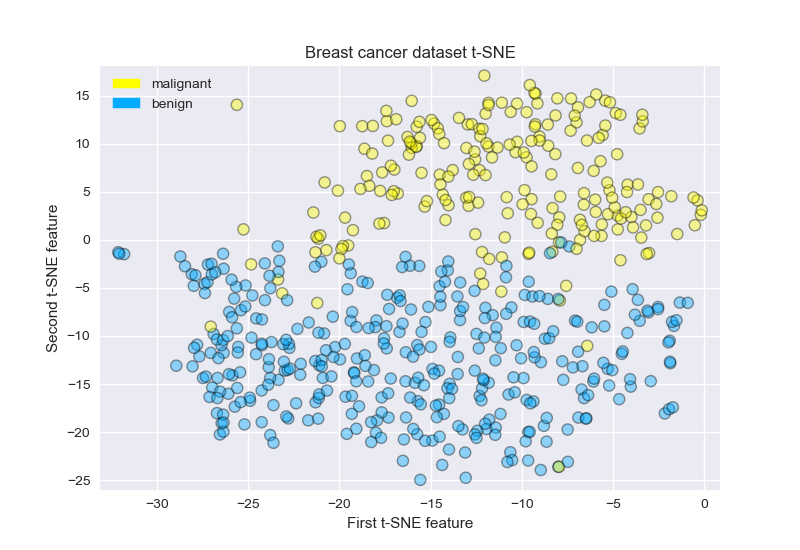

In [74]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

### Finding a way to divide a dataset into groups ('clusters')

#### Data points within the same cluster should be 'close' or 'similar' in some way.
#### Data points in different clusters should be 'far apart' or 'different'.
#### Clustering algorithms output a cluster membership index for each data point:
---- 1. Hard clustering: each data point belongs to exactly one cluster.

---- 2. Soft (or fuzzy) clustering: each data point is assigned a weight, score, or probability of membership for each cluster.

Inter-cluster distances are maximized, intra-cluster distances are minimized.

### K-means
#### Initialization: Pick the number of clusters k you want to find. Pick k random points to serve as an initial guess for the cluster centers. K-means finds k cluster centers in different regions of the feature space that it thinks represent very different groups.
#### Step A: Assign each data point to the nearest cluster center.
#### Step B: Update each cluster center by replacing it with the mean of all points assigned to that cluster (Step A)
#### Repeat steps A and B until the centers coverge to a stable solution.
Different random starting points for the cluster centers often result in very different clustering solutions.

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


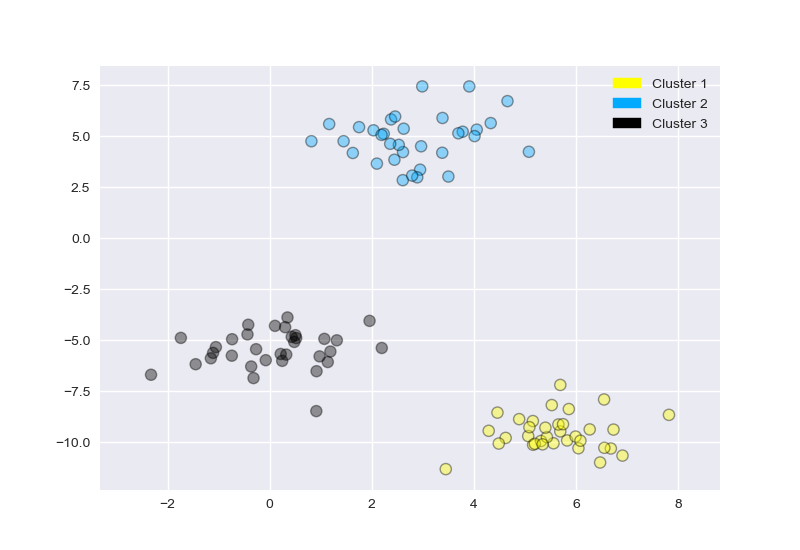

In [75]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<IPython.core.display.Javascript object>


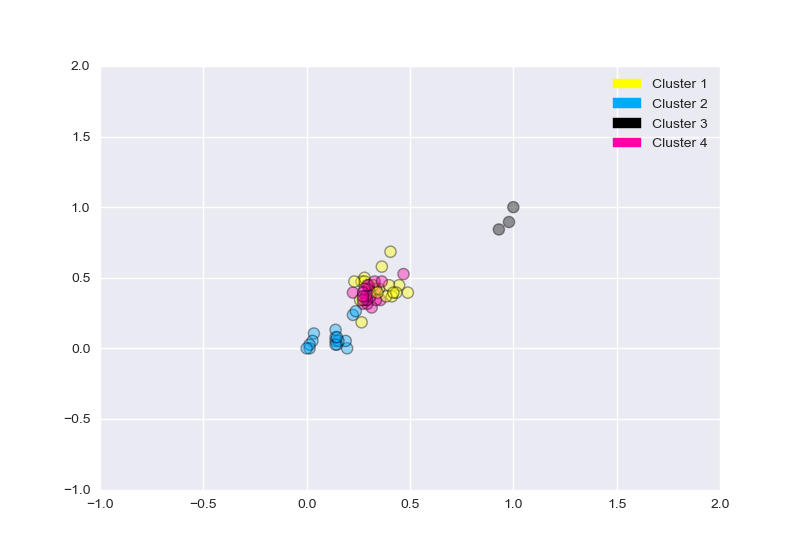

In [79]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#### Note: K-means is very sensitive to the range of feature values, need to be normalized or minmaxscale.

### Limitations of k-means
#### Works well for simple clusters that are same size, well-separated, globular shapes.
#### Does not do well with irregular, complex clusters.
#### k-means is fit to use continuous features. Variants of k-means like k-medoids can work with categorical features.

### Agglomerative clustering
#### Need to be predict and fit each time. Agglomerative Clustering cluster instances from the bottom(single one) to the top until criteria is met (number of clusters).
#### We can choose how the agglomerative clustering algorithm determines the most similar cluster by specifying one of several possible linkage criteria.
#### Ward's method: usual method of choice
---- Least increase in total variance (around clusters centroids)
#### Average linkage
---- Average distance between clusters(previous instances in each cluster)
#### Complete linkage
---- Max distance between clusters (the max distance between the new instances to the data points in different clusters)

<IPython.core.display.Javascript object>


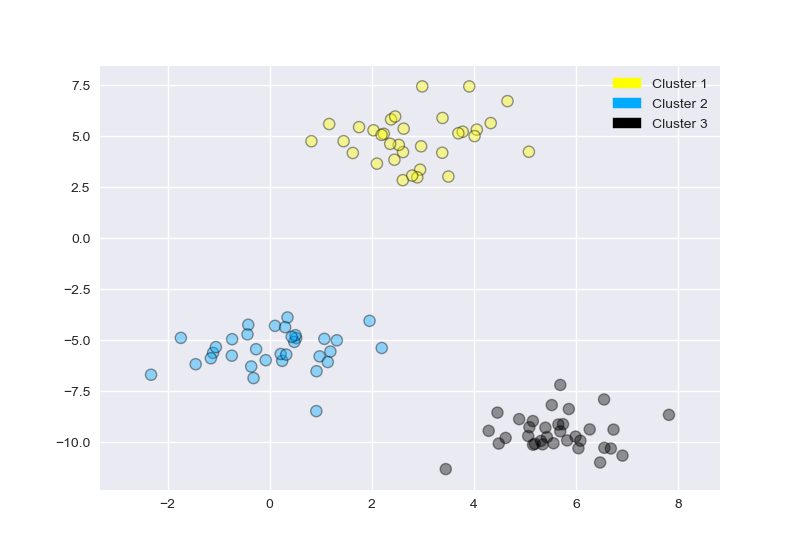

In [80]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


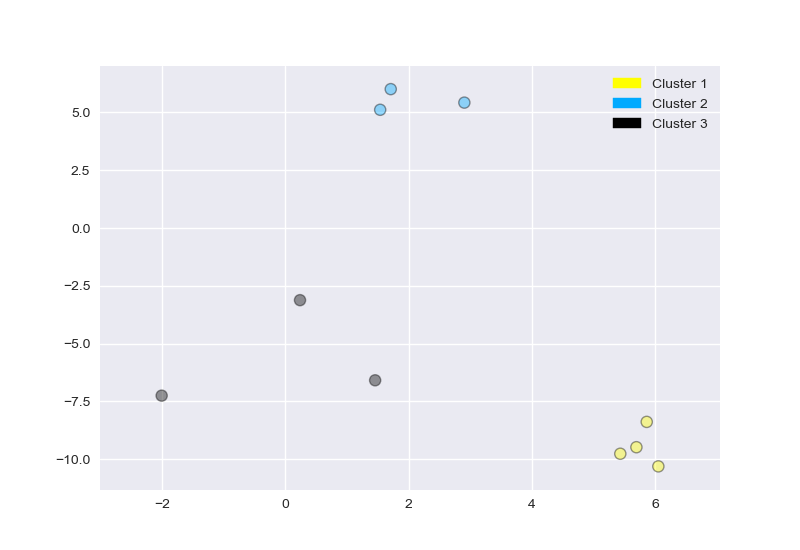

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [81]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

### Hierarchical Clustering

<IPython.core.display.Javascript object>


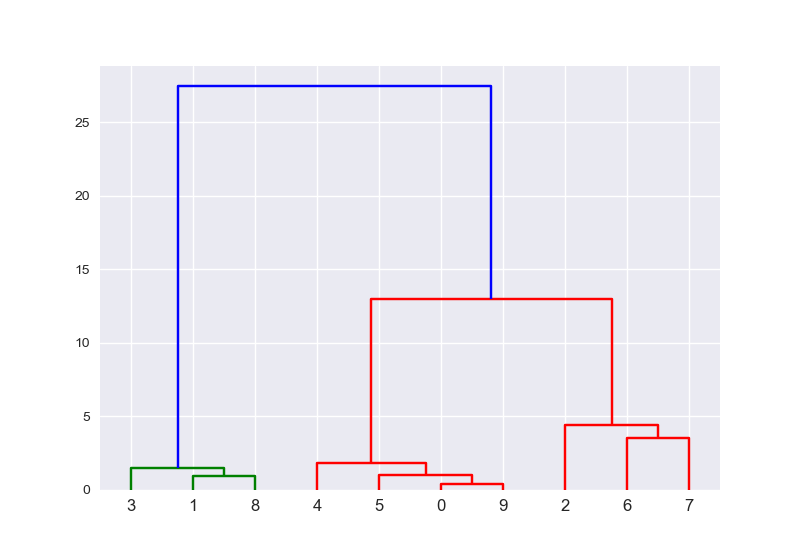

In [82]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
## The ward() function returns an array that specifies the distances spanned during the agglomerative clustering.
plt.show()

### DBSCAN clustering : Density Based Spatial Clustering of Applications with Noise.

#### Unlike k-means, you don't need to specify # of clusters
#### Relatively efficient -  can be used with large datasets.
#### Identifies likely noise points (outliers)


Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


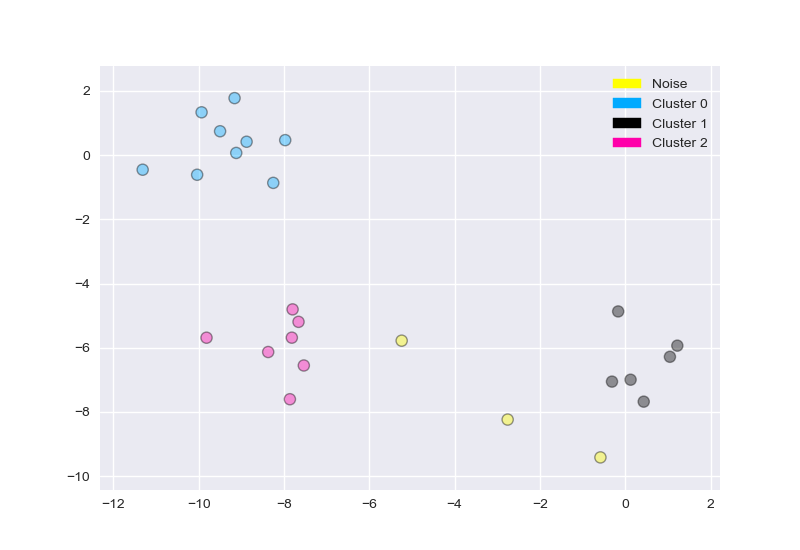

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)
## eps = neighbor radius parameter, min_samples = neighbor count parameter

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

### Clustering Evaluation
#### With ground truth, existing labels can be used to evaluate cluster quality.
#### Without ground truth, evaluation can be difficult: multiple clisterings may be plausible for a dataset.
#### Consider task-based evaluation: evaluate clustering according to performance on a task that does have an objective basis for comparison.
#### Example: the effectiveness of clustering-based features for a supervised learning task.
#### Some evaluation heuristics exist (e.g. silhouette) but these can be unreliable.